# Inter-State Traffic Prediction

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor , export_graphviz , plot_tree 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
df= pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [32]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,3539,None,243.39,0.0,0.0,20,Clouds,few clouds,02/10/12 19:00
1,2784,None,243.62,0.0,0.0,1,Clear,sky is clear,02/10/12 20:00
2,2361,None,244.22,0.0,0.0,1,Clear,sky is clear,02/10/12 21:00
3,1529,None,244.82,0.0,0.0,1,Clear,sky is clear,02/10/12 22:00
4,963,None,244.82,0.0,0.0,1,Clear,sky is clear,02/10/12 23:00


### Column description:

## EDA

In [33]:
df.shape

(48194, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48194 entries, 0 to 48193
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48194 non-null  int64  
 1   holiday              48194 non-null  object 
 2   temp                 48194 non-null  float64
 3   rain_1h              48194 non-null  float64
 4   snow_1h              48194 non-null  float64
 5   clouds_all           48194 non-null  int64  
 6   weather_main         48194 non-null  object 
 7   weather_description  48194 non-null  object 
 8   date_time            48194 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Null Check

In [35]:
df.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48194.0,3259.413433,1986.856265,0.00,1192.0000,3379.00,4933.00,7280.00
temp,48194.0,281.264219,12.709587,243.39,272.1825,282.46,291.81,310.07
rain_1h,48194.0,0.334333,44.793779,0.00,0.0000,0.00,0.00,9831.30
snow_1h,48194.0,0.000222,0.008168,0.00,0.0000,0.00,0.00,0.51
clouds_all,48194.0,49.363904,39.016223,0.00,1.0000,64.00,90.00,100.00


In [37]:
df['weather_main'].value_counts()

Clouds          15157
Clear           13388
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [38]:
df['holiday'].value_counts()

None                         48133
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [39]:
df['temp'].value_counts()

274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
          ... 
263.990      1
264.040      1
264.060      1
264.100      1
310.070      1
Name: temp, Length: 5842, dtype: int64

#### Converting date and time into - year, month, day and hours column.

In [40]:
df['date_time']=pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
df.drop('date_time',axis=1,inplace = True)

In [41]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,3539,None,243.39,0.0,0.0,20,Clouds,few clouds,Friday,2,2012,19
1,2784,None,243.62,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,20
2,2361,None,244.22,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,21
3,1529,None,244.82,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,22
4,963,None,244.82,0.0,0.0,1,Clear,sky is clear,Friday,2,2012,23


#### Categorical columns: holiday, weather_main, weather_description, day
#### Numerical columns: traffic_volume, temp, rain_1h, snow_1h, clouds_all, month, year, hour

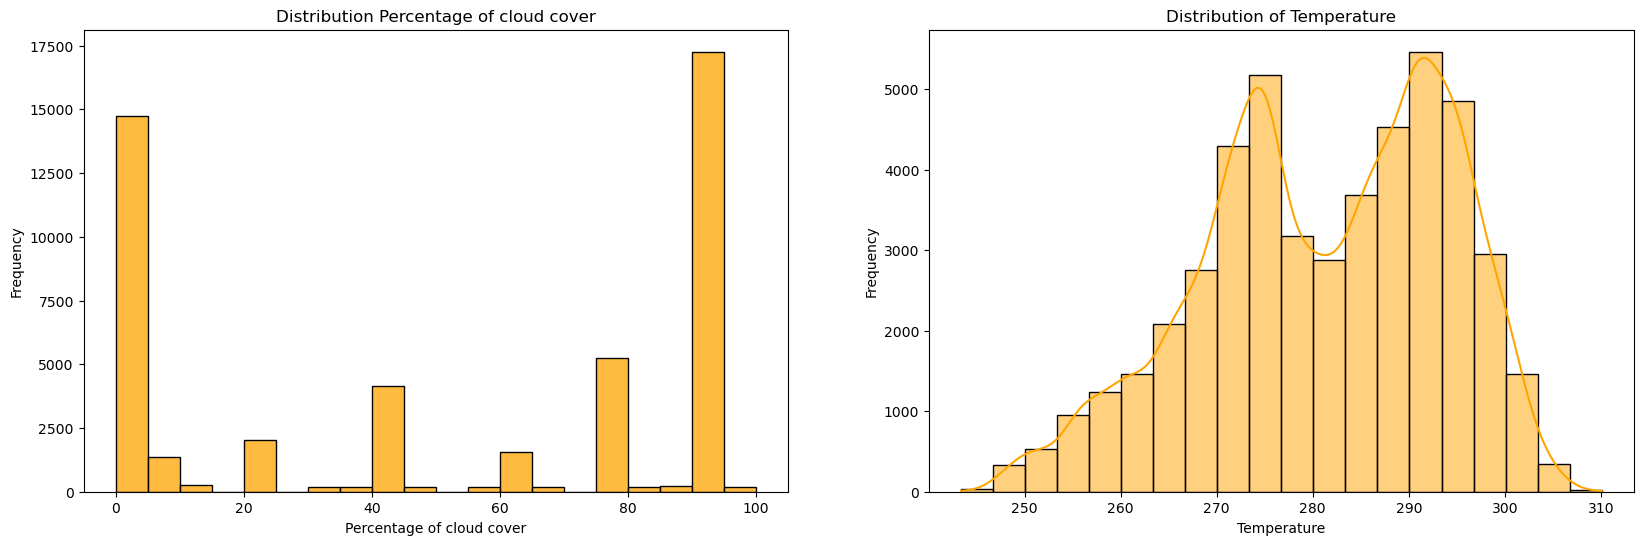

In [42]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['clouds_all'], bins=20, color='orange')
plt.title('Distribution Percentage of cloud cover')
plt.xlabel('Percentage of cloud cover')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['temp'], bins=20, kde=True,color='orange')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

#### Distribution of Percentage of cloud cover shows that normally its 0-10% or 90-100, in some other cases it varies from 10-90.
#### Distribution of temperature show that it varies from 250 to 310 Kelvin.

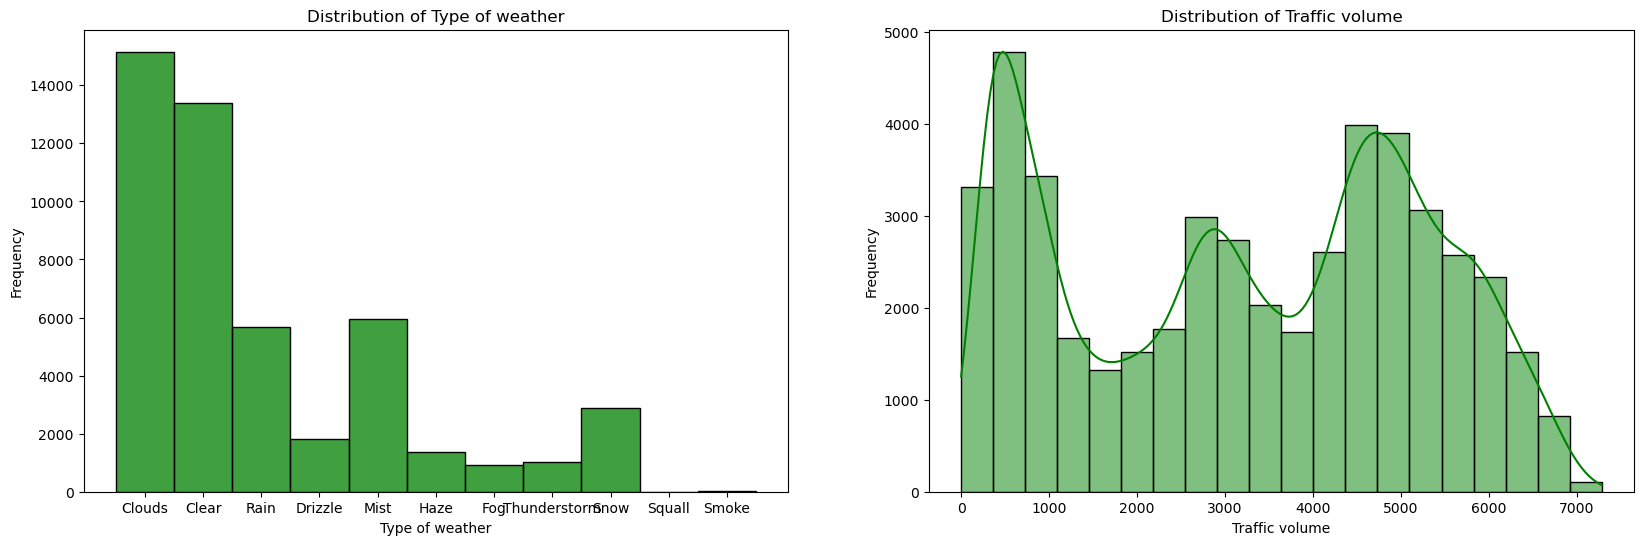

In [43]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['weather_main'], bins=20, color='green')
plt.title('Distribution of Type of weather')
plt.xlabel('Type of weather')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['traffic_volume'], bins=20, kde=True,color='green')
plt.title('Distribution of Traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')

plt.show()

#### 1.Distribution of Type of weather shows most frequent weather types are: Clouds, Clear, Mist and Rain.
#### 2.Distribution of Traffic volume range from 0 to 700.

### Box plot for outliers check.

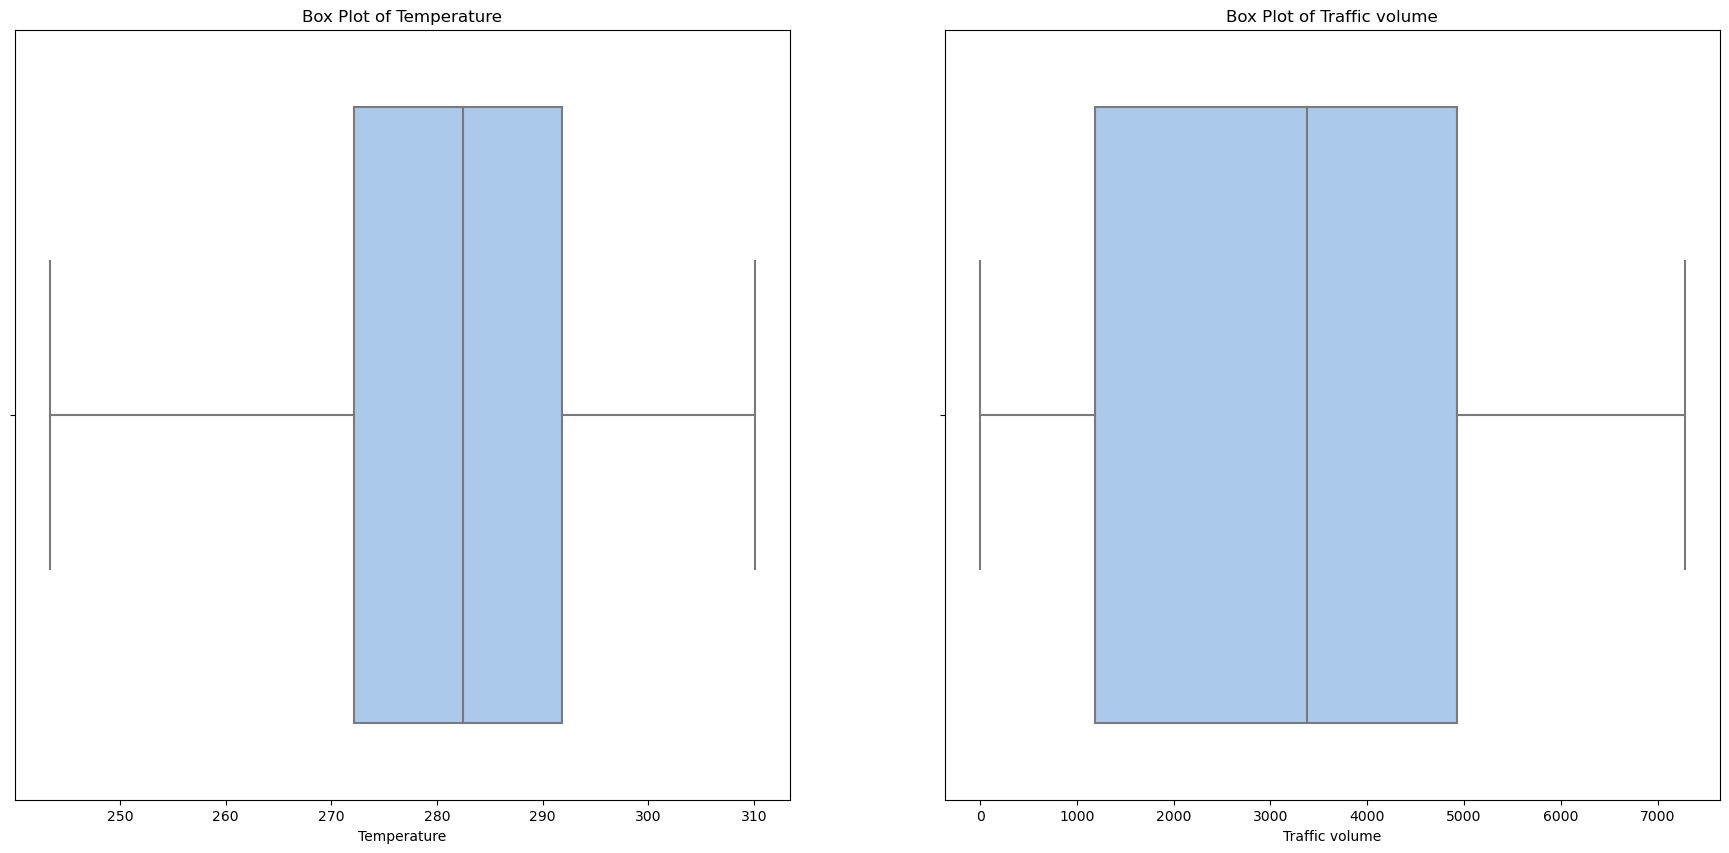

In [44]:
plt.figure(figsize=(22, 10))

plt.subplot(1,2,1)
sns.boxplot(x=df['temp'],palette = ("pastel"))
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')

plt.subplot(1,2,2)

sns.boxplot(x=df['traffic_volume'],palette = ("pastel"))
plt.title('Box Plot of Traffic volume')
plt.xlabel('Traffic volume')
plt.show()

#### 1. Temp column doesn't have outliers present as show in above boxplot
#### 2. Traffic volume column doesn't have outliers present as show in above boxplot

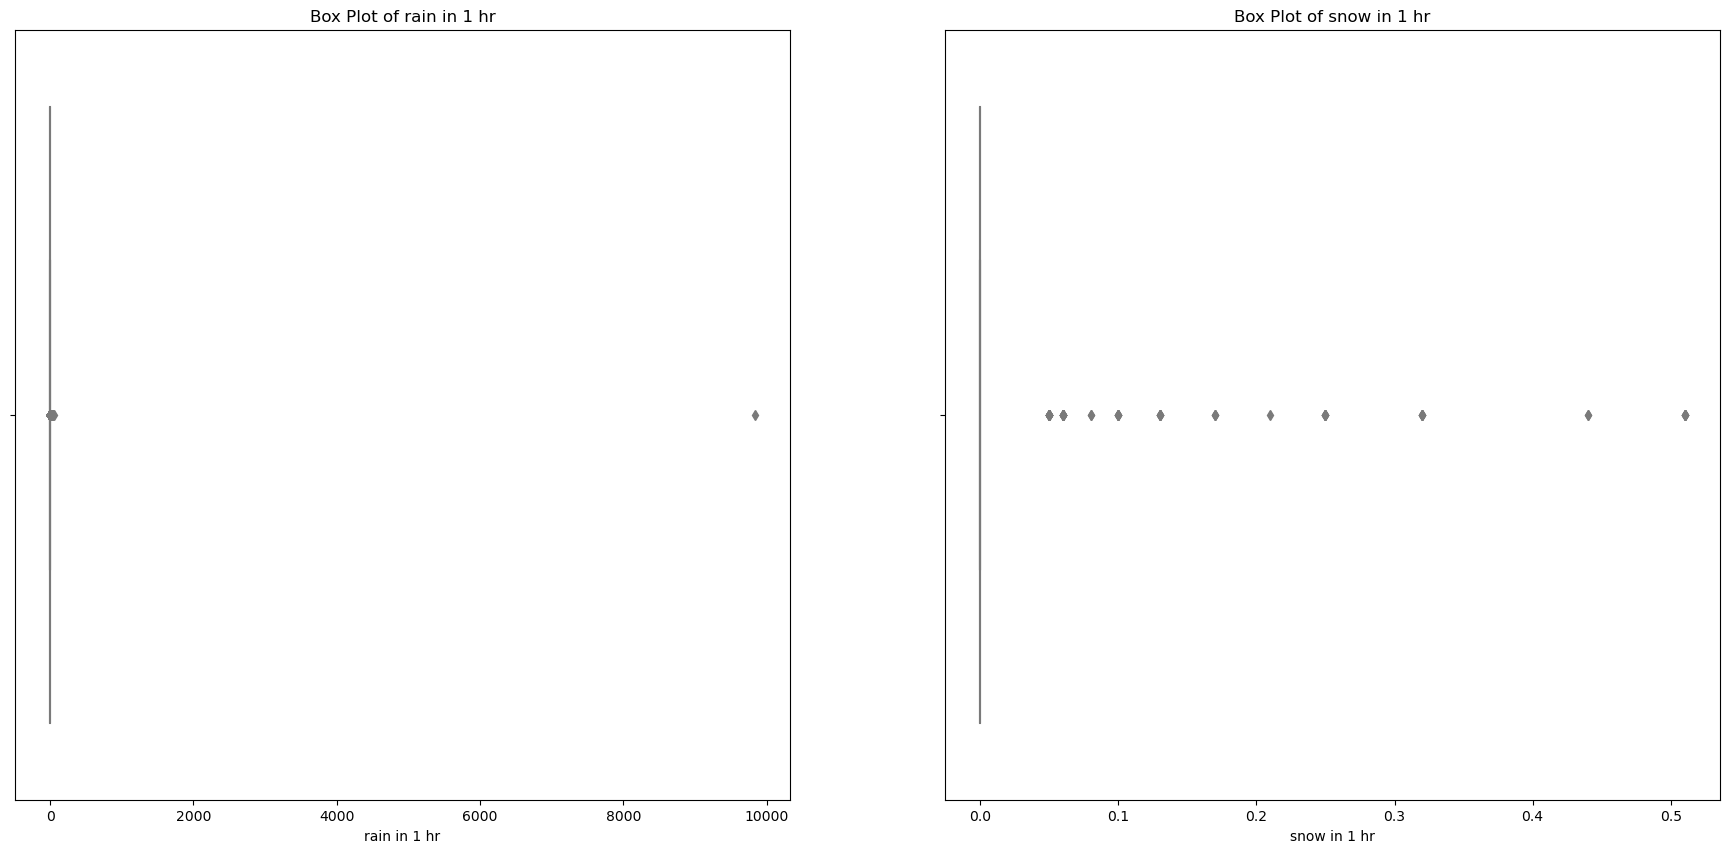

In [45]:
plt.figure(figsize=(22, 10))
plt.subplot(1,2,1)
sns.boxplot(x=df['rain_1h'] ,palette = ("pastel"))
plt.title('Box Plot of rain in 1 hr')
plt.xlabel('rain in 1 hr')

plt.subplot(1,2,2)
sns.boxplot(x=df['snow_1h'],palette = ("pastel"))
plt.title('Box Plot of snow in 1 hr')
plt.xlabel('snow in 1 hr')

plt.show()

#### 1. rain_1h column have some outliers present in right side as show in above boxplot
#### 2. sonw_1h column have several outliers present in right side as show in above boxplot 
   Treat outliers in Data preprocessing

In [46]:
df.head(1)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,3539,None,243.39,0.0,0.0,20,Clouds,few clouds,Friday,2,2012,19


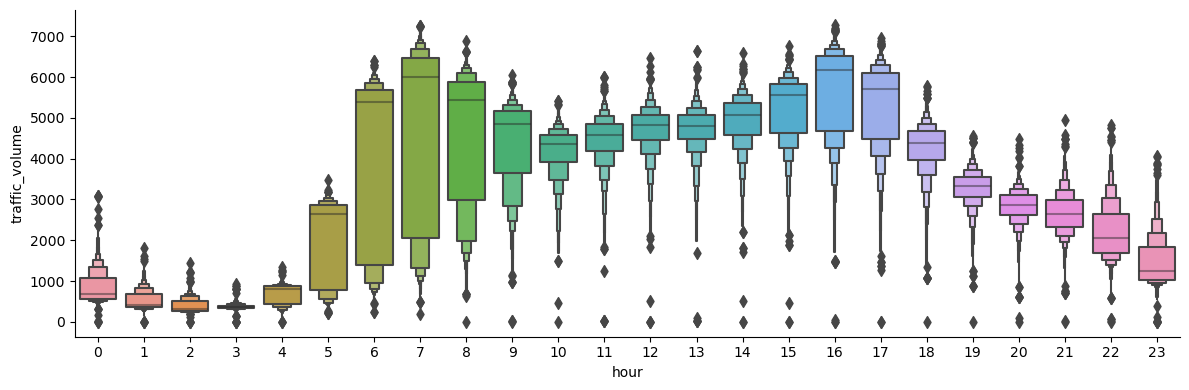

In [47]:
sns.catplot(y = "traffic_volume", x = "hour", data = df.sort_values("traffic_volume", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

#### With the help of catplot, trying to plot the boxplot between hour and traffic volume. We can observe that hours 9 to 18 have most no. of outliers present

In [48]:
categorical = df[['holiday', 'weather_main', 'weather_description', 'day']]
numerical = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'month', 'year', 'hour']]

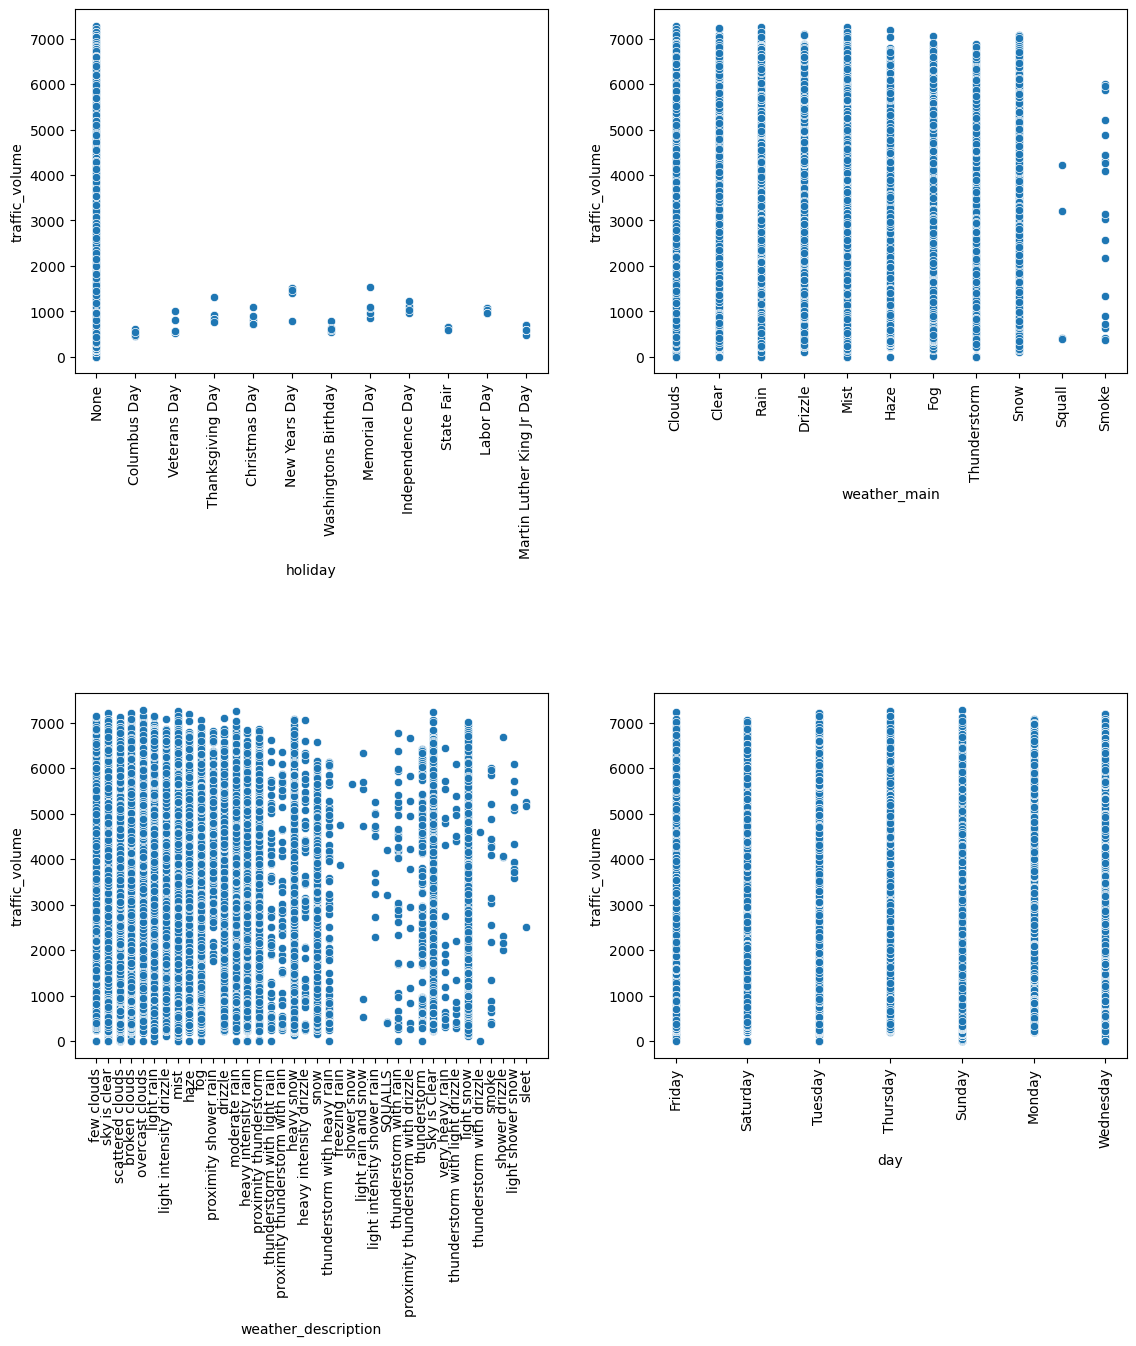

In [49]:
c=1
plt.figure(figsize=(12,25))
for i in categorical:
    plt.subplot(4,2,c)
    sns.scatterplot(x = df[i] , y = df.traffic_volume)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

### Inferences:
#### 1. at no holiday the traffic volume is highest when compared to holidays.
#### 2. when weather type is squall the traffic volume is lowest followed by weather type - smoke.
#### 3. traffic volume is lowest when weather description is given as- freezing snow, shower snow , thunderstrom and drizzle and sleet.
#### 4. day-wise the traffic volume is almost similar throughout the week. 

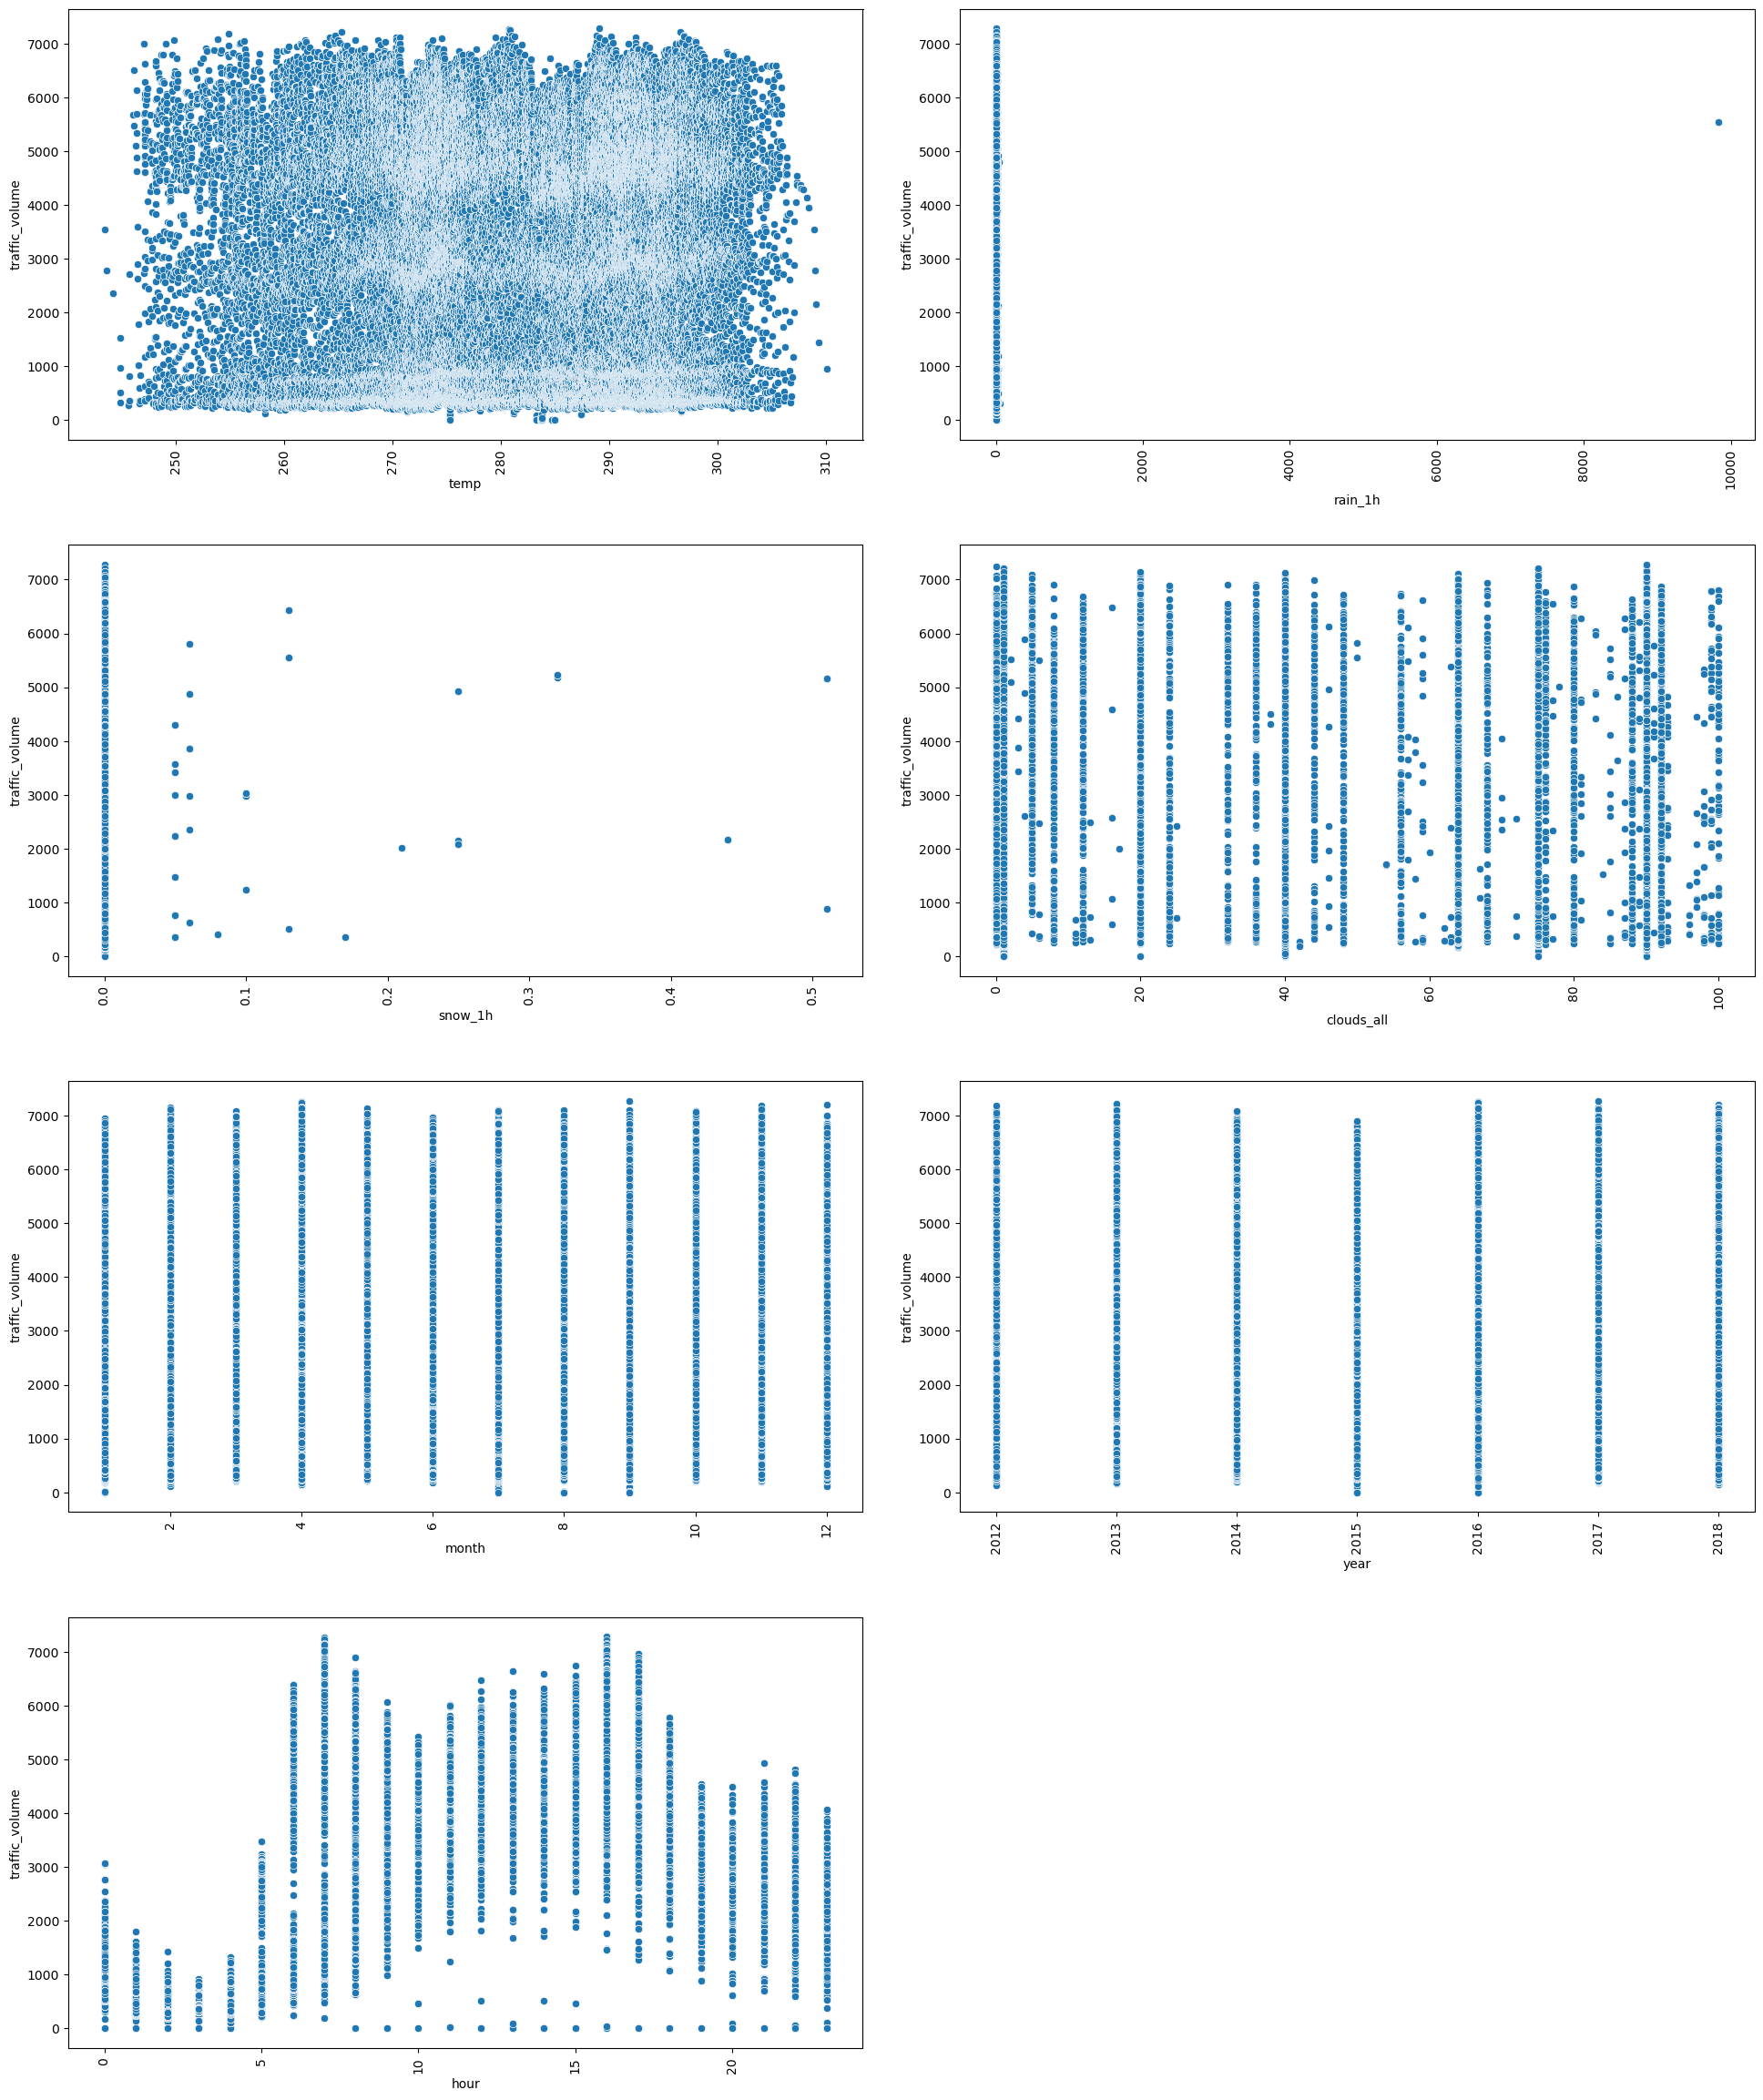

In [50]:
c=1
plt.figure(figsize=(20,35))
for i in numerical:
    plt.subplot(6,2,c)
    sns.scatterplot(x = df[i] , y = df.traffic_volume)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

### Inferences:
#### 1. traffic volume dosen't change much with change in temperature.
#### 2. Amount in mm of rain in a hour is 0 traffic volume varies from 0 to 7000.
#### 3. Amount in mm of snow in a hour is  0 traffic volume varies from 0 to 7000 also, it decreases as amount of snow increases .
#### 4. percentage of cloud cover , month and year doesn't affect the traffic volumne much as shown .
#### 5. traffic volumne changes with hour, from hour 0 to 5 the traffic volume is lowest as its sleeping hour and traffic volume increases with working hours( 6 to 20 hours).

/var/folders/df/gkwqvrj55wxfb4mf2lw812xm0000gn/T/ipykernel_29873/3545501177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="Purples")


<Axes: >

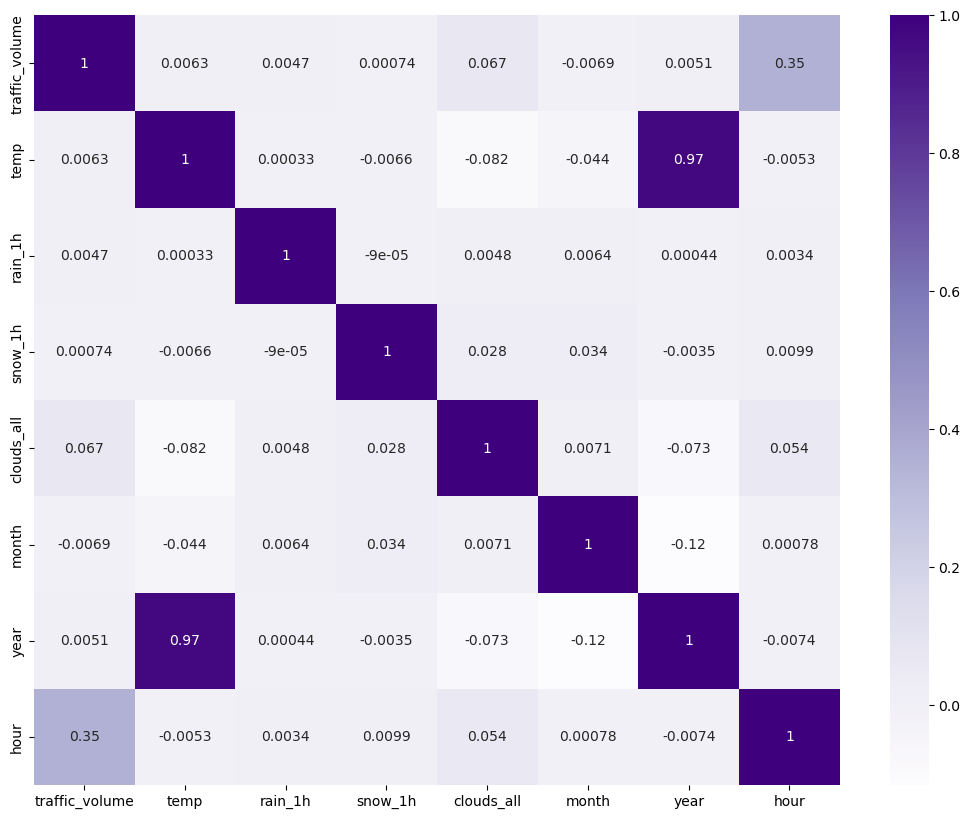

In [51]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(),annot=True, cmap="Purples")

#### Traffic is highly correlated with hour, followed by Percentage of cloud cover

## Data pre-processing

In [52]:
df.duplicated().sum()

45

In [53]:
df=df.drop_duplicates()

In [54]:
df.duplicated().sum()

0

### Removing outliers:

In [55]:
df_num = df.select_dtypes(include='number')

In [56]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [57]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [58]:
df.shape

(44623, 12)

### Encoding categorical columns

In [59]:
cat_col = ['holiday','weather_main','weather_description','day']
encoder =  LabelEncoder()
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])

In [60]:
df['holiday'].value_counts()

7     44567
9         6
6         6
4         6
1         5
10        5
0         5
11        5
5         5
2         5
8         5
3         3
Name: holiday, dtype: int64

### Standardization

In [61]:
scaler = MinMaxScaler()
df['traffic_volume'] = scaler.fit_transform(df[['traffic_volume']])
df['temp'] = scaler.fit_transform(df[['temp']])

### Spliting data set for X and y.

In [62]:
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']
X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,7,0.000000,0.0,0.0,20,1,4,0,2,2012,19
1,7,0.003449,0.0,0.0,1,0,27,0,2,2012,20
2,7,0.012448,0.0,0.0,1,0,27,0,2,2012,21
3,7,0.021446,0.0,0.0,1,0,27,0,2,2012,22
4,7,0.021446,0.0,0.0,1,0,27,0,2,2012,23


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,shuffle = True)

## KNN Regression

#### Fitting KNN regression model for 5 nearset neighbours

In [65]:
Knn_model = KNeighborsRegressor(n_neighbors= 5)
Knn_model.fit(X_train,y_train) #fitting the model using X_train and y_train learning of model

KNeighborsRegressor()

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = Knn_model.predict(X_train) # predicting values using X_train
mse_knn = mean_squared_error(y_train, train_preds)# comparing above values with our actual values of y_train and finding error


print(' KNN Train Mean Squared Error: ',mse_knn)

test_pred = Knn_model.predict(X_test)
mse_testknn = mean_squared_error(test_pred , y_test)

print('\n KNN Test Mean Squared Error: ',mse_testknn)


 KNN Train Mean Squared Error:  0.009055973584732322

 KNN Test Mean Squared Error:  0.015319696988939278


## KNN CV

In [69]:
from sklearn.model_selection import cross_val_score

#### CV on train dataset

In [77]:
knn = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation
scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and compute mean
mse_scores_train = -scores_train
mean_cv_train = np.mean(mse_scores_train)

# Print the mean squared error
print("KNN CV Mean Squared Error:", mean_cv_train)

KNN CV Mean Squared Error: 0.015444473071646337


#### CV on test data set

In [78]:
knn = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation
scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and compute mean
mse_scores_test = -scores_test
mean_test_cv = np.mean(mse_scores_test)

# Print the mean squared error
print("Mean Squared Error:", mean_test_cv)

Mean Squared Error: 0.021586887406441865


## Linear Regression

In [79]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [81]:
mse_trainlr = mean_squared_error(y_train,lr_train)
print("LR Train Mean Squared Error:",mse_trainlr)
mse_testlr = mean_squared_error(y_test,lr_test)
print("LR Test Mean Squared Error:",mse_testlr)

LR Train Mean Squared Error: 0.06458796441076292
LR Test Mean Squared Error: 0.06391000665369345


In [82]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, lr_train)
r2_test = r2_score(y_test,lr_test)
print('R2 Train',r2_train)
print('R2 Test',r2_test)

R2 Train 0.13132846897744588
R2 Test 0.14204175376070227


## Decision Tree

In [83]:
Dt_model = DecisionTreeRegressor()
Dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [84]:
train_pred = Dt_model.predict(X_train)

In [85]:
mse_Dt = mean_squared_error(y_train,train_pred)
print('DT Train Mean Squared Error:',mse_Dt)

DT Train Mean Squared Error: 3.19171985853406e-35


In [87]:
test_pred = Dt_model.predict(X_test)
mse_testdt = mean_squared_error(y_test,test_pred)
print('DT Test Mean Squared Error:',mse_testdt)

DT Test Mean Squared Error: 0.01795513495127552


### Important features

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [89]:
print(selection.feature_importances_)

[3.21226327e-05 5.04299820e-02 0.00000000e+00 0.00000000e+00
 1.72154161e-02 1.28294117e-02 1.30324420e-02 6.21346580e-02
 3.91731712e-02 2.12387156e-02 7.83914081e-01]


<Axes: >

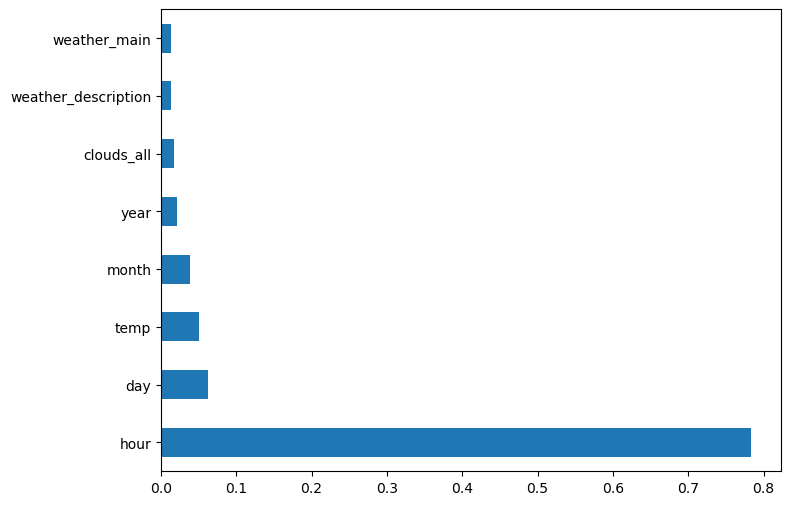

In [92]:
plt.figure(figsize = (8,6))
feature_importance = pd.Series(selection.feature_importances_,index=X_train.columns)
feature_importance.nlargest(8).plot(kind='barh')

#### among all the important features, hour is the most important followed by day and temp.

##  Comparing models:


####  KNN Train Mean Squared Error:  0.00905
#### KNN Test Mean Squared Error:      0.01531
#### LR Train Mean Squared Error:  0.06458
#### LR Test Mean Squared Error:         0.06391
#### DT Train Mean Squared Error: 3.191719e-35
#### DT Test Mean Squared Error:         0.01795

###  Conclusion:

In [ ]:
On Train dataset: Decision Tree model performs best on training data as MSE is lowest for DT.